<a href="https://colab.research.google.com/github/typsydevio/pytorch101/blob/main/Pytorch_Practice_Sessions/LinearRegressionWithPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

In [11]:
X_numpy = torch.from_numpy(X_numpy.astype(np.float32))
y_numpy = torch.from_numpy(y_numpy.astype(np.float32))

In [16]:
y_numpy = y_numpy.view(y_numpy.shape[0], 1)

In [19]:
input_dims, output_dims = X_numpy.shape[1], 1

In [20]:
model = nn.Linear(input_dims, output_dims)

In [37]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [38]:
n_iters = 1000

In [39]:
for epoch in range(n_iters):
  # Forward Pass
  y_predicted = model(X_numpy)

  #Loss/Criterion computation

  l = criterion(y_predicted, y_numpy)

  #Backpropagation and next step

  l.backward()
  optimizer.step()
  optimizer.zero_grad()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

epoch 1: w = 77.378, loss = 353.76397705
epoch 11: w = 78.120, loss = 348.06594849
epoch 21: w = 78.754, loss = 343.90197754
epoch 31: w = 79.296, loss = 340.85830688
epoch 41: w = 79.759, loss = 338.63305664
epoch 51: w = 80.155, loss = 337.00576782
epoch 61: w = 80.493, loss = 335.81552124
epoch 71: w = 80.782, loss = 334.94476318
epoch 81: w = 81.028, loss = 334.30770874
epoch 91: w = 81.239, loss = 333.84143066
epoch 101: w = 81.420, loss = 333.50024414
epoch 111: w = 81.574, loss = 333.25045776
epoch 121: w = 81.706, loss = 333.06762695
epoch 131: w = 81.819, loss = 332.93374634
epoch 141: w = 81.915, loss = 332.83575439
epoch 151: w = 81.997, loss = 332.76397705
epoch 161: w = 82.068, loss = 332.71145630
epoch 171: w = 82.128, loss = 332.67294312
epoch 181: w = 82.180, loss = 332.64477539
epoch 191: w = 82.224, loss = 332.62411499
epoch 201: w = 82.261, loss = 332.60897827
epoch 211: w = 82.294, loss = 332.59793091
epoch 221: w = 82.321, loss = 332.58981323
epoch 231: w = 82.345,

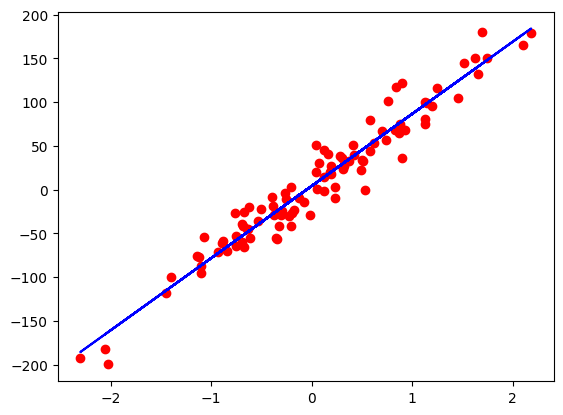

In [42]:
predicted = model(X_numpy).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()